In [1]:
# CNN with MNIST data
# Guessing numbers from handwritted numbers
# "..is a large database of handwritten digits that is commonly used for training various image processing systems"
# https://en.wikipedia.org/wiki/MNIST_database
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 9s 1us/step


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

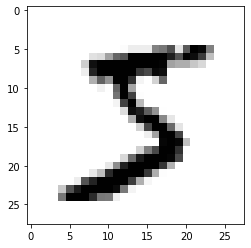

In [8]:
plt.imshow(single_image,cmap = 'gray_r')

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
# Need to one hot encode

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [17]:
#Encoded 5
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
# Need to scale/normalise x data
x_train = x_train/255
x_test = x_test/255

In [31]:
scaled_single = x_train[0]

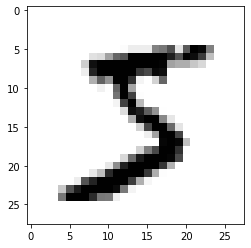

In [33]:
plt.imshow(scaled_single,cmap = 'gray_r')

In [34]:
# Reshape data
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [37]:
# Build model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
# Model defintion

model = Sequential()
# Conv layer
model.add(Conv2D(filters=32, kernel_size = (4,4),input_shape=(28,28,1), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten 2D to 1D
model.add(Flatten())
# Dense layer
model.add(Dense(128,activation='relu'))
# Output classifier
model.add(Dense(10,activation='softmax'))
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Model fitting

model.fit(x_train,y_cat_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 29s 478us/step - loss: 0.0511 - accuracy: 0.9842
Epoch 2/2
60000/60000 [==============================] - 28s 461us/step - loss: 0.0363 - accuracy: 0.9890


In [45]:
# Evaluation

model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 107us/step


[0.053796864102507246, 0.984000027179718]

In [47]:
# Predict on unseen images

In [48]:
from sklearn.metrics import classification_report

In [49]:
predicitions = model.predict_classes(x_test)

In [50]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
preictions

array([7, 2, 1, ..., 4, 5, 6])

In [52]:
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.95      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Good with only 2 epochs!